In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## OSEMN Pipeline

### O - Obtain data

### S - Clean data

### E - Explore data

### M - Model data

### N - Interpret data

# Data Preprocessing

In [4]:
df = pd.DataFrame(pd.read_csv("data/GlucoseBMI.csv"))

The DataFrame.describe() method provides statistics summarizing data distribution, excluding NaN values. It works solely with numeric data and ignores categorical values unless include="all" is specified. The generated statistics include count (non-empty rows), mean, standard deviation, minimum, and maximum values. Additionally, it offers quartiles (25%, 50%, 75%) to identify outliers in the dataset.

In [7]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.head()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Replacing zeros with NaN is advisable because this facilitates counting, and zeros can subsequently be substituted with appropriate values.
df_new = df.copy(deep = True)
df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_new.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [13]:
#Listing of 10 largest values for that field
df.nlargest(10,['Glucose'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
561,0,198,66,32,274,41.3,0.502,28,1
8,2,197,70,45,543,30.5,0.158,53,1
228,4,197,70,39,744,36.7,2.329,31,0
408,8,197,74,0,0,25.9,1.191,39,1
579,2,197,70,99,0,34.7,0.575,62,1
22,7,196,90,0,0,39.8,0.451,41,1
206,8,196,76,29,280,37.5,0.605,57,1
359,1,196,76,36,249,36.5,0.875,29,1
498,7,195,70,33,145,25.1,0.163,55,1


In [15]:
#Standardize the variable
df_new = df.std()
df_new

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

# Exploratory Data Analysis


<AxesSubplot:>

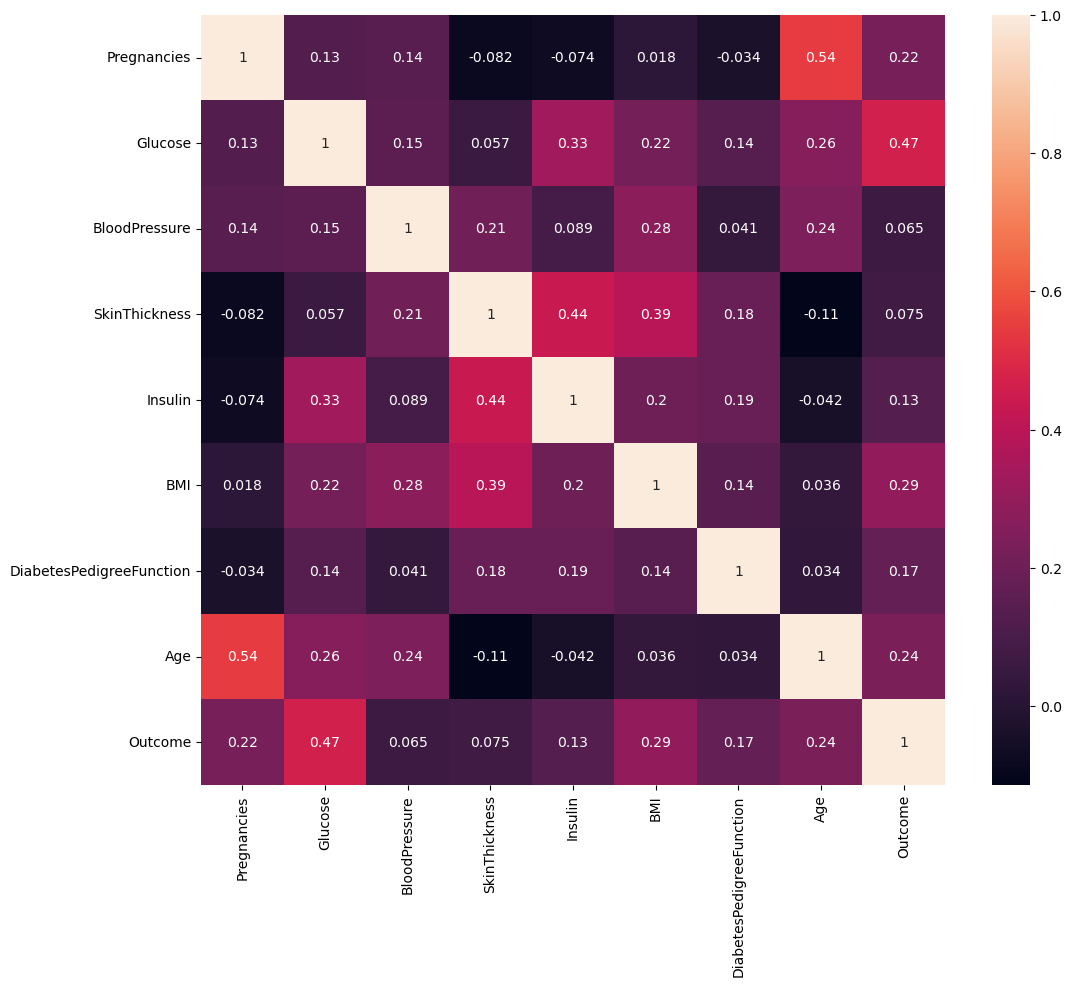

In [19]:
df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True)

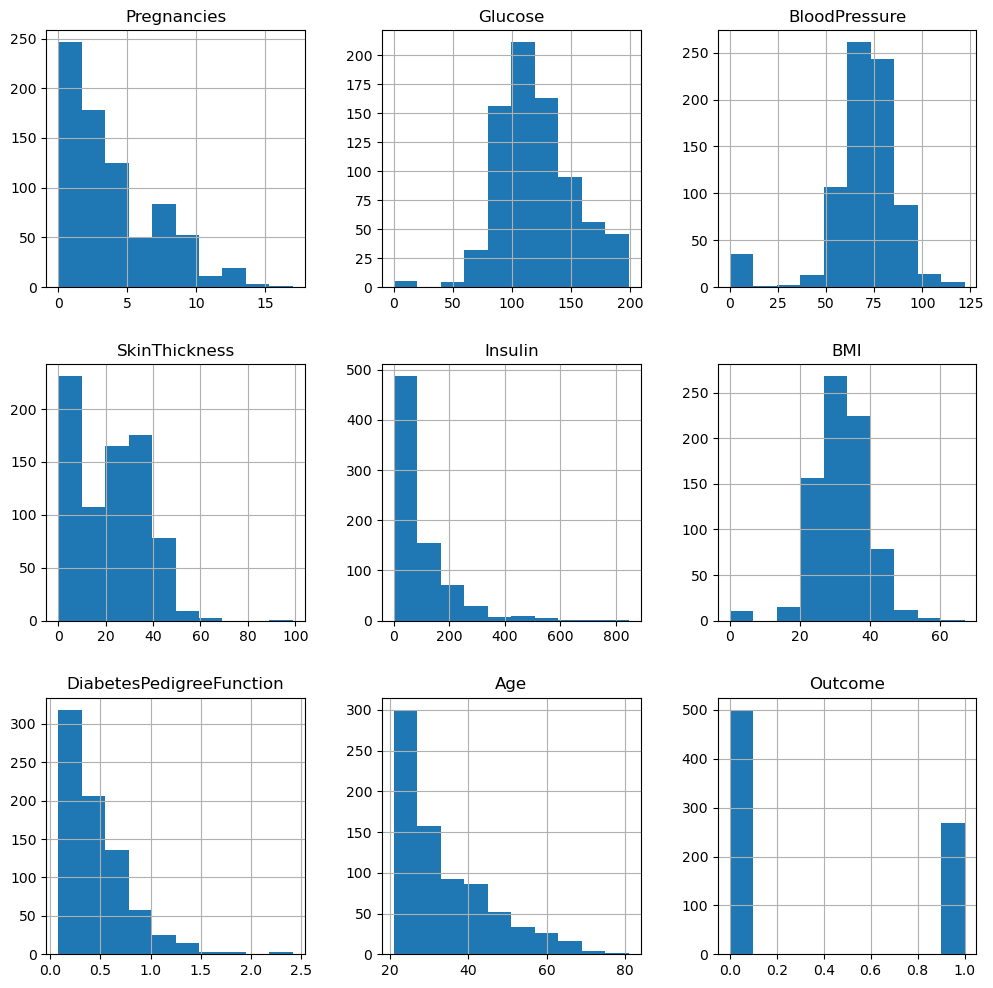

In [20]:
#Histogram
df.hist(figsize = (12,12))
plt.show()

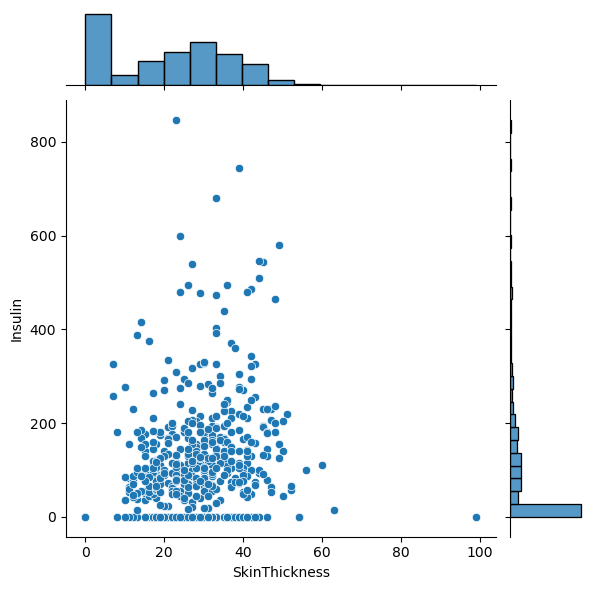

In [21]:
#scatterplot
sns.jointplot(x='SkinThickness', y='Insulin', data=df)

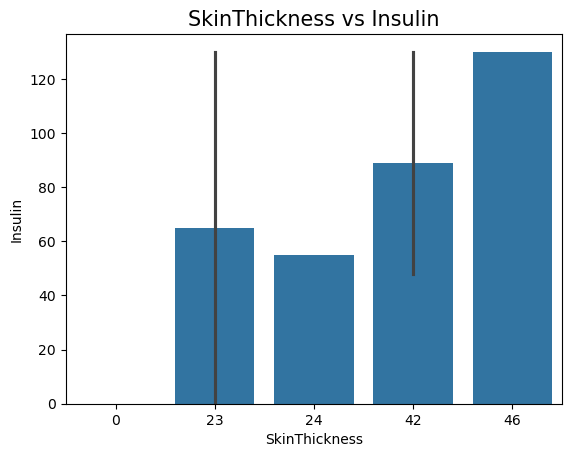

In [22]:
#barplot
sns.barplot(x='SkinThickness', y='Insulin', data=df[170:180])
plt.title("SkinThickness vs Insulin", fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

<AxesSubplot:xlabel='count', ylabel='Outcome'>

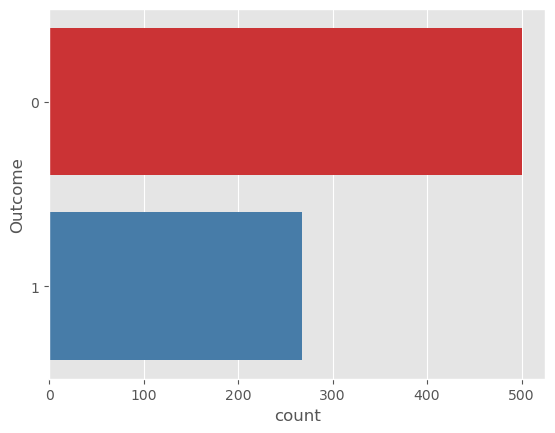

In [23]:
# Lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

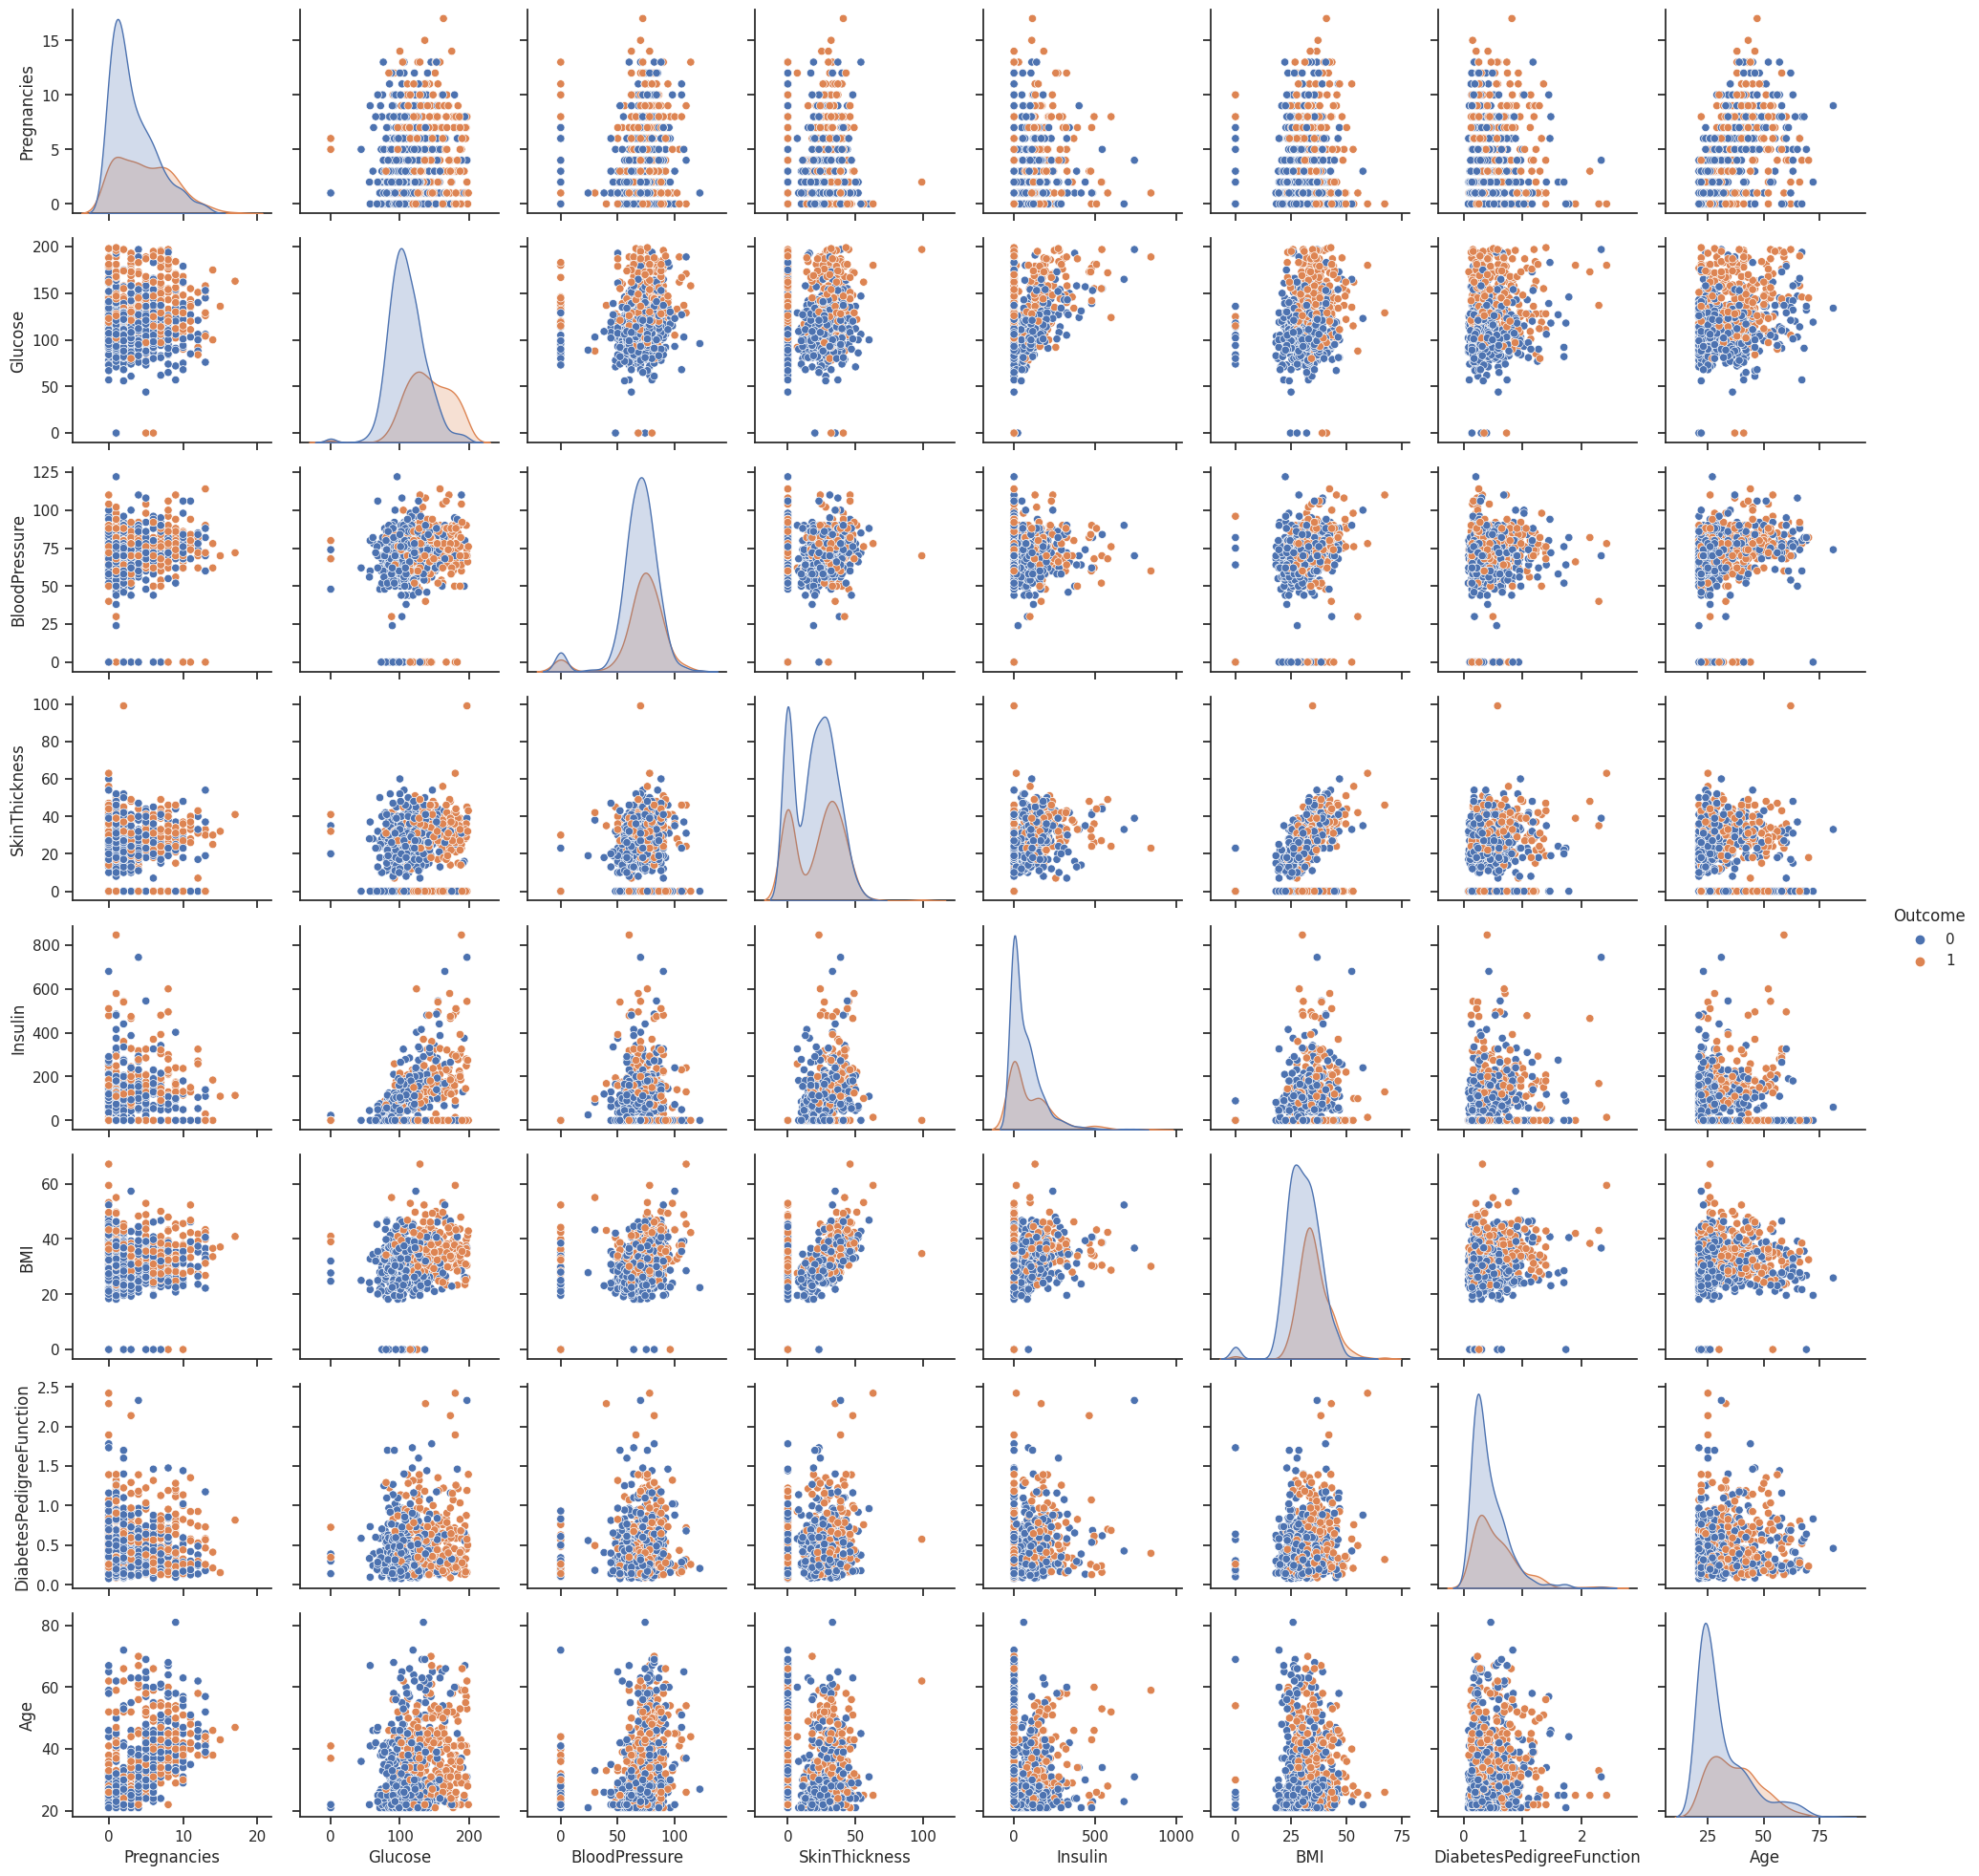

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

# Data Modeling

In [25]:
df.shape

(768, 9)

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
#lets extract features and targets
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [28]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_test, y_pred): return confusion_matrix(y_test, y_train)[0, 0]
def fp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[0, 1]
def fn(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 0]
def tp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 1]

In [32]:
#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

# Implementation of Statistical Hypothesis Test using Scipy and Sci-kit

In [34]:
import researchpy as rp

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 2.9 MB/s eta 0:00:0000:010:01


In [36]:
df.groupby("Outcome").agg({"Glucose":[np.mean, np.std, np.size]})

Glucose                
               mean        std size
Outcome                            
0        109.980000  26.141200  500
1        141.257463  31.939622  268

In [37]:
df_glucose = df[['Glucose', 'Outcome']]

In [38]:
df_glucose["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_glucose
# Need to convert 1 and 0 in Outcome column to Diabetes and NotDiabetes respectively for further hypothesis testing

,Glucose,Outcome
0,148,Diabetes
1,85,NotDiabetes
2,183,Diabetes
3,89,NotDiabetes
4,137,Diabetes
...,...,...
763,101,NotDiabetes
764,122,NotDiabetes
765,121,NotDiabetes
766,126,Diabetes


In [39]:
rp.ttest(group1= df_glucose['Glucose'][df_glucose['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_glucose['Glucose'][df_glucose['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")

(      Variable      N        Mean         SD        SE   95% Conf.    Interval
 0     Diabetes  268.0  141.257463  31.939622  1.951023  137.416116  145.098810
 1  NotDiabetes  500.0  109.980000  26.141200  1.169070  107.683094  112.276906
 2     combined  768.0  120.894531  31.972618  1.153712  118.629722  123.159340,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =    31.2775
 1                   Degrees of freedom =   766.0000
 2                                    t =    14.6001
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     1.1053
 7                            Hedge's g =     1.1042
 8                       Glass's delta1 =     0.9793
 9                     Point-Biserial r =     0.4666)

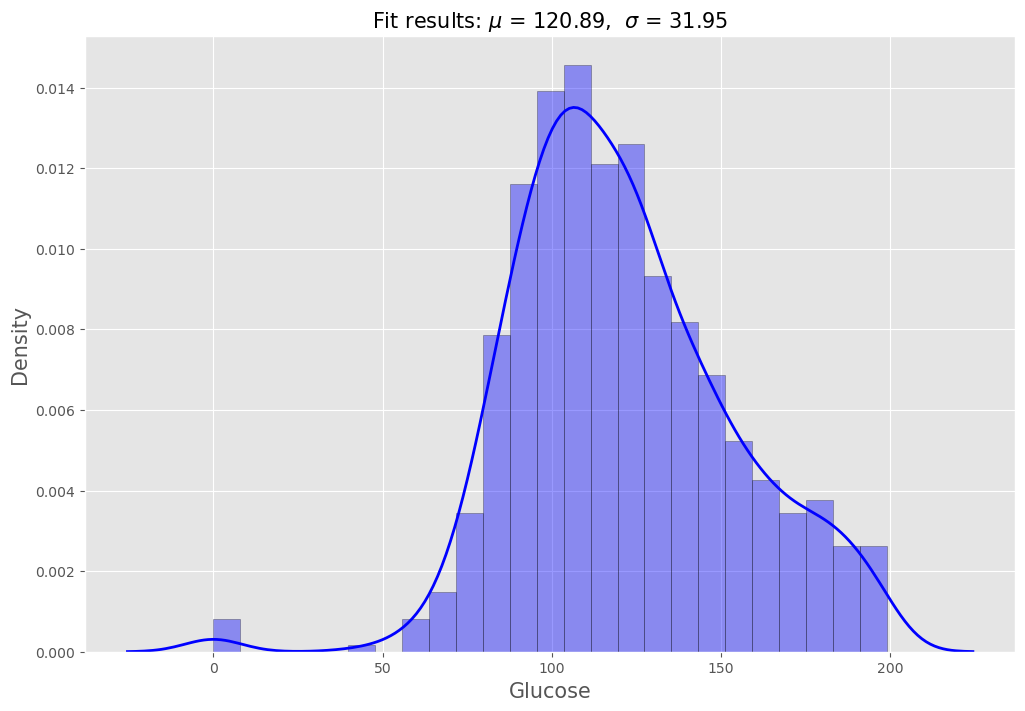

In [40]:
from scipy.stats import norm
mu, std = norm.fit(df_glucose['Glucose'])
plt.figure(figsize = [12, 8])
sns.distplot(df_glucose['Glucose'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Glucose", size=15)
plt.ylabel("Density", size=15);

# Regression Analysis

In [61]:
#Lets build the model
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics


from sklearn.metrics import ConfusionMatrixDisplay
model = LogisticRegression(solver='liblinear')
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

0.7727272727272727


Confusion Matrix:
[[90 12]
 [23 29]]


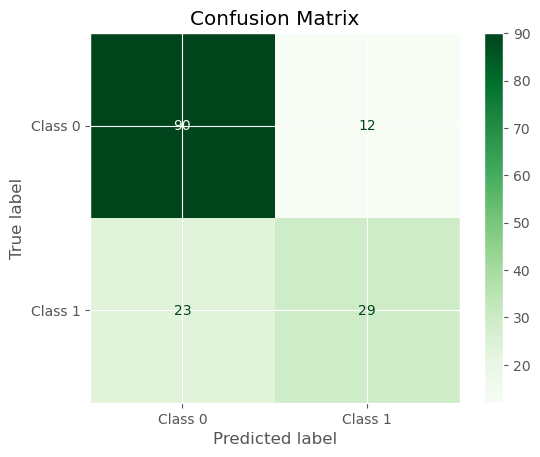

In [63]:
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix as a heatmap
ConfusionMatrixDisplay(conf_matrix, display_labels=["Class 0", "Class 1"]).plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [64]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

Accuracy: 0.773
Precision: 0.707
Recall: 0.558
F1 Score: 0.624


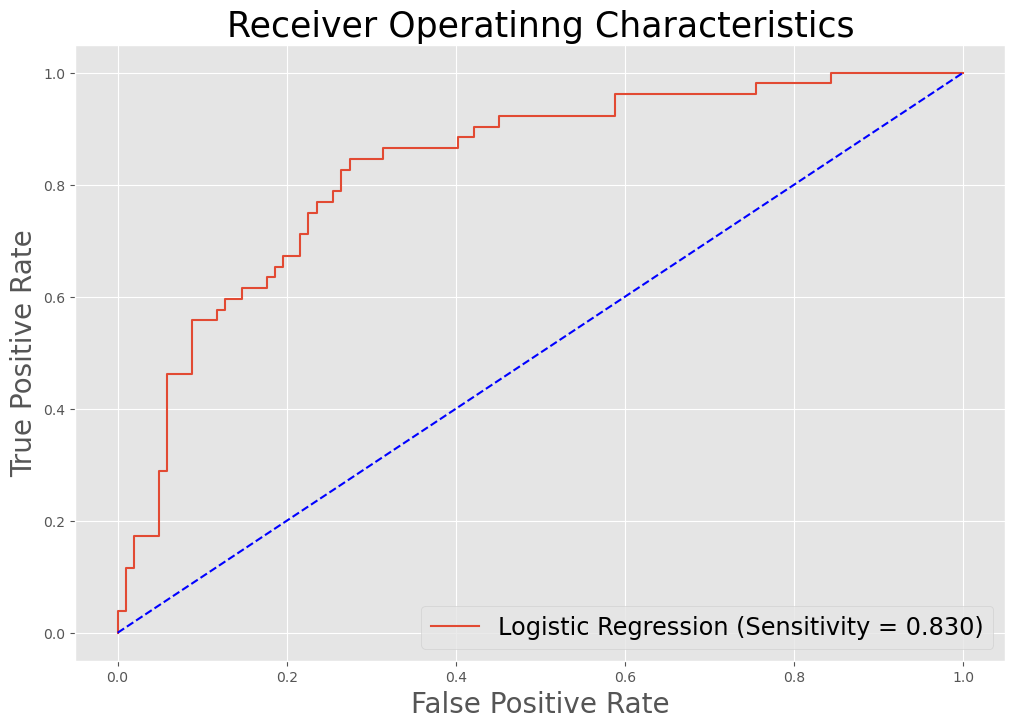

In [66]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.807


In [67]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       102
           1       0.71      0.56      0.62        52

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



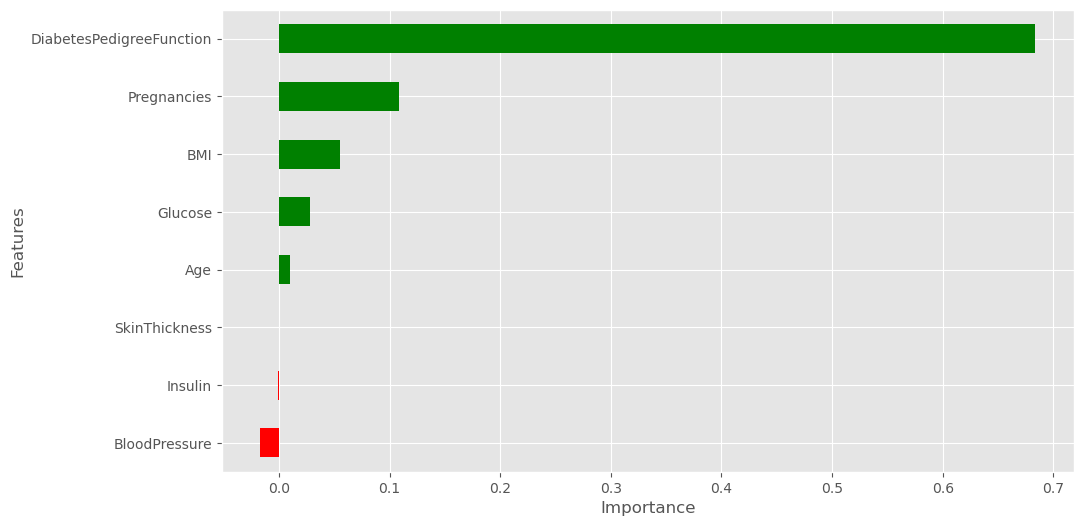

In [69]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance');